# Aditya Aggarwal (IIT2019210) Submission Machine Learning Assignment on Dimensionality Reduction

In [1]:
#Importing the libraries used in this assignment

#To deal with many arrays, numpy will be used
import numpy as np

#Pandas is a very famous library used for managing the numpy arrays in form of Dataframes
import pandas as pd

#For plotting matplotlib and seaborn will be used
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# importing the important sklearn libraries as we are allowed to use them as said in the question
from sklearn import datasets, svm   #SVM is used for support vector machine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA   #LDA is used fot linear discrimnant analysis
from sklearn.model_selection import train_test_split    #train_test_split will be used to split the data into training and test data
from sklearn import datasets      #This library contains several datasets from sklearn
from sklearn.metrics import accuracy_score  #accuracy score is used to predict the correctness of the model
from sklearn.datasets import fetch_openml   #This is used for another dataset to be used in q2
from sklearn.decomposition import PCA       #PCA is a model named as principal component analysis
from sklearn.manifold import TSNE           #TSNE is the T-distributed stochastic neighbor embedding
from sklearn.linear_model import LogisticRegression #it is a very famous classfier
from sklearn import metrics

# Q1. 
## Method 1:
### (i)From Iris flower data set take only two features (sepal width and petal length). Project the labelled data on a 2D graph. Try to classify this data by drawing linear boundaries intuitively.
## Method 2:
### (ii) Now take all the features and apply MDA on this Iris flower data set and plot the labelled data on 2D graph.
## (iii)Show the plots of above two methods and write in your own words why method2 works better than method1.

## Part 1 or Method 1

In [2]:
# As asked in the question in method 1, I am loading the iris dataset into a variable called as iris_dataset
iris_dataset=datasets.load_iris()

# Converting the iris_dataset which is of type numpy into type dataframe to make more attractive 
data=pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']], columns=iris_dataset['feature_names']+['target'])

# Outputing the dataframe generated from iris_dataset
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Now in the above dataframe we can observe that there are 5 columns - sepal length, sepal width, petal length, petal width and target (First 4 columns in centimeter). The last column is the value of flower.

In [3]:
# This unique method will print all the unique values in the column named as target in dataframe data
data["target"].unique()

array([0., 1., 2.])

Now, we can see that there are only 3 unique values which corresponds to 3 types of flowers namely, (setosa, versicolor and verginica). This it means the target column as a limited set of values(3) and it makes it a classfication problem.

In [4]:
# Now in method 1 we are asked to take only 2 feature columns namely, sepal width and petal length. So, I am storing them into X
X=data[['sepal width (cm)', 'petal length (cm)']]

# Creating a copy of variable X into variable x
x=X

# In the y I am storing the the target column.
y=data["target"]

Before moving to projecting the data into graph, we must see the relationship between the two feature columns given to us. 
This can be done by plotting various kind of graphs in between sepal width and petal length

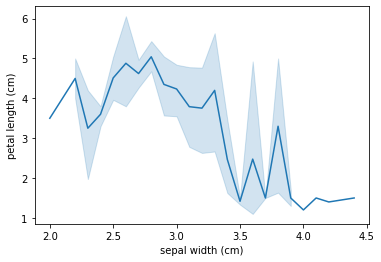

In [5]:
# 1. I am doing this by using line plot
sns.lineplot(data=data, x="sepal width (cm)", y="petal length (cm)")

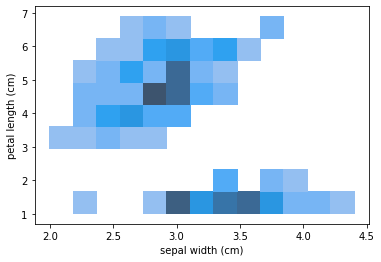

In [6]:
# 2. I am doing this by using hist plot
sns.histplot(data=data, x="sepal width (cm)", y="petal length (cm)")

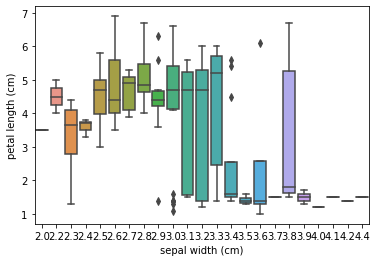

In [7]:
# 3. I am doing this by using box plot
sns.boxplot(data=data, x="sepal width (cm)", y="petal length (cm)")

From the box graph I can observe that there are some outliers in the data

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


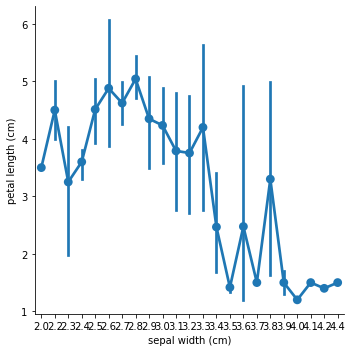

In [8]:
# 4. I am doing this by using factor plot
sns.factorplot(data=data, x="sepal width (cm)", y="petal length (cm)")

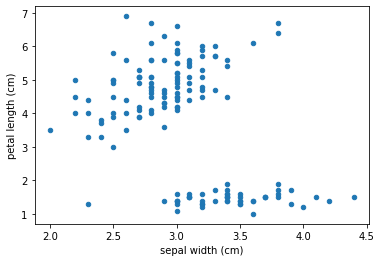

In [9]:
# 5. I am doing this by using scatter matrix
data.plot.scatter(x="sepal width (cm)",y="petal length (cm)")

I could observe from the above graphs that even there are some outliers in the dataset, classes are coupled closely and on the whole the data is good for prediction and will give a good accuracy score. The scatter matrix does not able to differentiate among the various classes in the data.

Now, I will be projecting the labelled data on a 2D graph

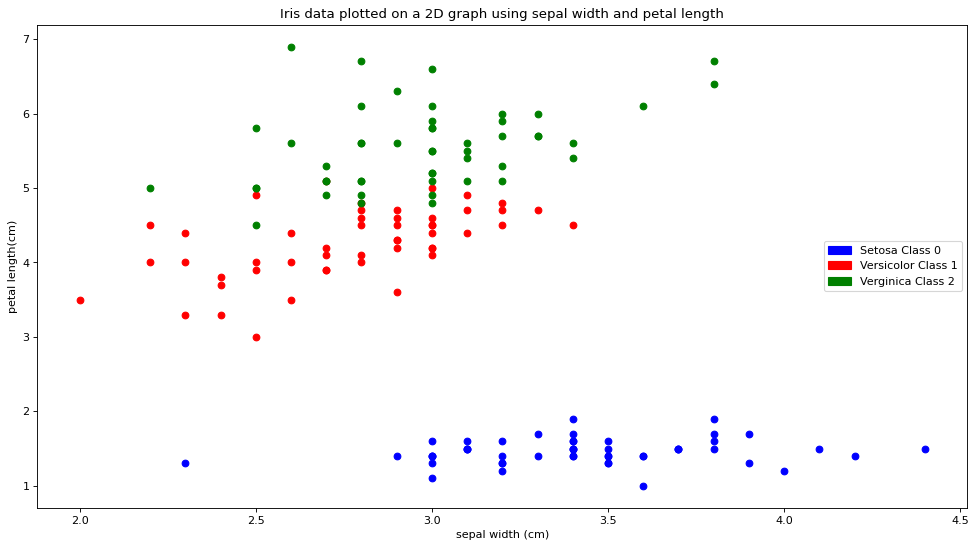

In [10]:
# This part can be done easily by plotting all the 150 points in the dataset

#Setting up the figure size to 15*8
plt.figure(figsize=(15, 8), dpi=80)

# iterating for each datapoint out of 150 points
for i in range(len(X['sepal width (cm)'])):

  # if class of ith data is 0
  if int(y[i])==0:
    # Plot the point taking sepal width on x-axis and petal length on y-axis with color blue and label as 0
    plt.scatter(X['sepal width (cm)'][i], X['petal length (cm)'][i], color="blue", label="0")
  
  # if class of ith data is 1
  elif int(y[i])==1:
    # Plot the point taking sepal width on x-axis and petal length on y-axis with color red and label as 1
    plt.scatter(X['sepal width (cm)'][i], X['petal length (cm)'][i], color="red", label="1")
  
  # if class of ith data is 2
  elif int(y[i])==2:
    # Plot the point taking sepal width on x-axis and petal length on y-axis with color green and label as 2
    plt.scatter(X['sepal width (cm)'][i], X['petal length (cm)'][i], color="green", label="2")

# Creating a xlabel for the plot
plt.xlabel("sepal width (cm)")

#Creating a ylabel for the plot
plt.ylabel("petal length(cm)")

#Using mpatches to create 3 labels for 3 different classes
class_0=mpatches.Patch(color='blue', label='Setosa Class 0')
class_1=mpatches.Patch(color='red', label='Versicolor Class 1')
class_2=mpatches.Patch(color='green', label='Verginica Class 2')

#legend is used to create the box in the graph which tells which color belongs to which class
plt.legend(handles=[class_0, class_1, class_2], loc='right')

#Creating the title of the plot
plt.title("Iris data plotted on a 2D graph using sepal width and petal length")

#Finally calling show to plot
plt.show()

Now, we will classify the data by drawing linear boundaries

In [11]:
# We have stored the dataframe in the X and y but for the model we need a numpy array.
# For that we are taking all the rows and first and second column for X and target column for y
# Second column is for sepal width and third for petal length
X=iris_dataset.data[:, 1:3]
y=iris_dataset.target

#Creating a support vector machine model to classify the data by drawing linear boundaries.
#This is taking a linear kernel for liner boundary and C value as 1.
#Since we need to plot the graph and not to predict as not asked in the question so, I am taking all the rows to build the model.
svc = svm.SVC(kernel='linear', C=1.0).fit(X, y)

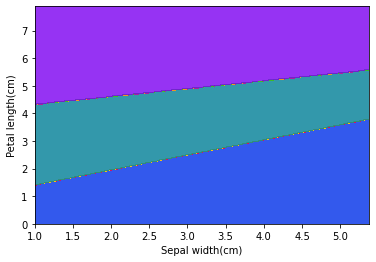

In [12]:
# This is a very famous 1 line method to find the minimum and maximum value from a numpy array
# X[:, 0].min() means considering all the rows and in first column what is the minimum value
# Similarly the defination goes for X[]:, 0].max()
# I am taking the minimum and maximum values to make boundary in the plot
# To consider the corner cases, I am plotting from min-1 to max+1
XMIN, XMAX=X[:, 0].min()-1, X[:, 0].max()+1
ymin, ymax=X[:, 1].min()-1, X[:, 1].max()+1

# Creating a mesh grid from the min and max values defined above
a, b = np.meshgrid(np.arange(XMIN, XMAX, 0.02), np.arange(ymin, ymax, 0.02))

#Creating x label
plt.xlabel('Sepal width(cm)')

#Creating y label
plt.ylabel('Petal length(cm)')

# This will be creating the linear boundaries as asked in the question
plt.contourf(a, b, svc.predict(np.c_[a.ravel(), b.ravel()]).reshape(a.shape), cmap="prism", alpha=0.8)

The 3 different colors tell the expected area of any new point. Like if sepal width is 1.5 and petal length is 7, the expected flower will fall in class 2 (purple color according to the above graph and green color according to the 2D graph)

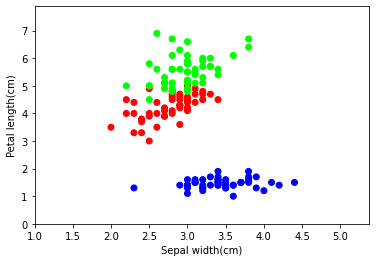

In [13]:
# Plot also the training points as done 2 cells above
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')

#Creating x label
plt.xlabel('Sepal width(cm)')

#Creating y label
plt.ylabel('Petal length(cm)')

#Setting up the xlimit
plt.xlim(a.min(), a.max())

#Setting up the ylimit
plt.ylim(b.min(), b.max())

plt.show()

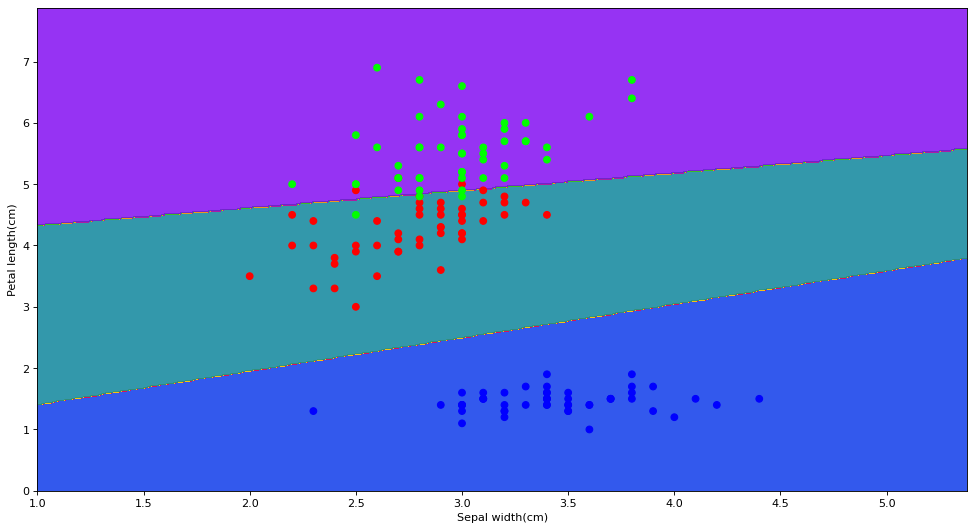

In [14]:
# Now we will plotting both the graphs on a same graph

#Setting up the figure size to 15*8
plt.figure(figsize=(15, 8), dpi=80)

# This will be creating the linear boundaries as asked in the question
plt.contourf(a, b, svc.predict(np.c_[a.ravel(), b.ravel()]).reshape(a.shape), cmap="prism", alpha=0.8)

# Plot also the training points as done 2 cells above
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')

#Creating x label
plt.xlabel('Sepal width(cm)')

#Creating y label
plt.ylabel('Petal length(cm)')

#Setting up the xlimit
plt.xlim(a.min(), a.max())

#Setting up the ylimit
plt.ylim(b.min(), b.max())

plt.show()

We can observe there that class 2 is almost separated from class 0 and class 1 (>95%) but the class 0 and class 1 have some points which goes on the wrong side. This is because of the outliers that we saw in the boxgraph.

## Part 2 or Method 2

In [15]:
# As asked in the question in method 1, I am loading the iris dataset into a variable called as iris_dataset
iris_dataset=datasets.load_iris()

# Converting the iris_dataset which is of type numpy into type dataframe to make more attractive 
data=pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']], columns=iris_dataset['feature_names']+['target'])

# Outputing the dataframe generated from iris_dataset
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In method 1, we were asked to solve with 2 feature columns but in this method we have to take all the features i.e. 4 features are there.


In [16]:
# Now in method 2 we are asked to all the feature columns. So, I am storing them into X
X=data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# In the y I am storing the the target column.
y=data["target"]

We are not asked to take a particular ratio of training and testing data so I am taking it as 0.66 i.e. 100 data to train and 50 to train

In [17]:
# The train_test_split will help us to split the data uniformly. 
# It will shuffle the data and will store 33% of random data for testing and rest for training with a random_state of 30
# This function returns the train and test data both for X and y.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=30)

We are asked to implement the MDA on iris dataset. Now, we do not have a direct model for that. Rather, when we apply LDA (Linear Discriminant Analysis) on multiple columns, it acts as MDA (Multiple Discriminant Analysis).

In [18]:
# We have already imported the model above, so I am just creating the lda model
lda=LDA()

# Now, I am fitting the training data or training my model
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [19]:
# Printing the actual Y values and prediceted Y values by the LDA model
print("Actual test output values are :", list(y_test))
print("Predicted test output values are :", list(lda.predict(X_test)))

Actual test output values are : [0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 2.0, 0.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Predicted test output values are : [0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0]


We can see almost all the classes predicted by the LDA model are in sync with (similar) with the actual class.

In [20]:
# Now, I am predicting the accuracy score of the model.
accuracy_score(y_test, lda.predict(X_test))

0.96

So, the accuracy of this model is very high that is 96%.

Now, we have to plot the graph as a 2D plot with is very difficult since the data has 4 features so we need 4 dimentions to plot but are asked for only 2. So, there are 2 ways to solve this issue. First, is that we plot the graph between every 2 features and secondly, is that we can reduce the dimentions to 2 using LDA and then plot the graph.

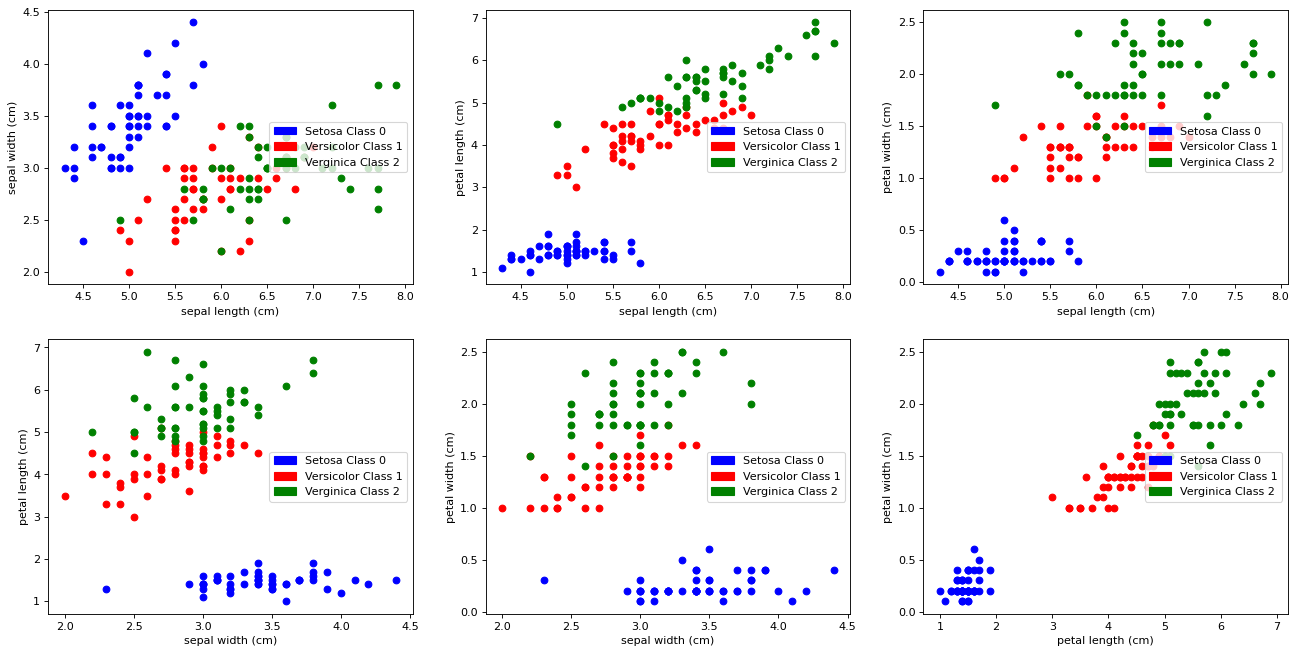

In [21]:
# As mentioned above, this is the first way in which I am plotting 2D grpah between every 2 features.
# Since, there are 4 features and we have to choose 2 so there will be total C(4, 2)=6 combinaitons and hence 6 plots will be there.
# I will be doing this by creating subplots of size (2,3)

# This function takes the graph number, names of x and y column and create a subplot of size (2,3) with subplot number as number.
def graph(plotNumber, xName, yName):

  #Defining the subplot number
  plt.subplot(2, 3, plotNumber)

  #Iterating in the feature columns
  for i in range(len(X[xName])):

    # If ith feature has class 0
    if int(y[i])==0:
      # Plotting the scatter matrix for xName column as x axis and yName column as y axis with color blue and label as 0
      plt.scatter(X[xName][i], X[yName][i], color="blue", label="0")

    # If ith feature has class 1
    elif int(y[i])==1:
      # Plotting the scatter matrix for xName column as x axis and yName column as y axis with color red and label as 1
      plt.scatter(X[xName][i], X[yName][i], color="red", label="1")

    # If ith feature has class 2
    elif int(y[i])==2:
      # Plotting the scatter matrix for xName column as x axis and yName column as y axis with color green and label as 2
      plt.scatter(X[xName][i], X[yName][i], color="green", label="2")
    
  #Using mpatches to create 3 labels for 3 different classes
  class_0=mpatches.Patch(color='blue', label='Setosa Class 0')
  class_1=mpatches.Patch(color='red', label='Versicolor Class 1')
  class_2=mpatches.Patch(color='green', label='Verginica Class 2')

  #legend is used to create the box in the graph which tells which color belongs to which class
  plt.legend(handles=[class_0, class_1, class_2], loc='right')

  # Creating a xlabel for the subplot
  plt.xlabel(xName)

  # Creating a ylabel for the subplot
  plt.ylabel(yName)

#Setting the size of the plot
plt.figure(figsize=(20, 10), dpi=80)

#Calling the graph method 6 times to make 6 subplots for 6 combinations
graph(1,'sepal length (cm)','sepal width (cm)')
graph(2,"sepal length (cm)","petal length (cm)")
graph(3,"sepal length (cm)","petal width (cm)")
graph(4,"sepal width (cm)","petal length (cm)")
graph(5,"sepal width (cm)","petal width (cm)")
graph(6,"petal length (cm)","petal width (cm)")

#Finally, calling the show method to show the graph.
plt.show()

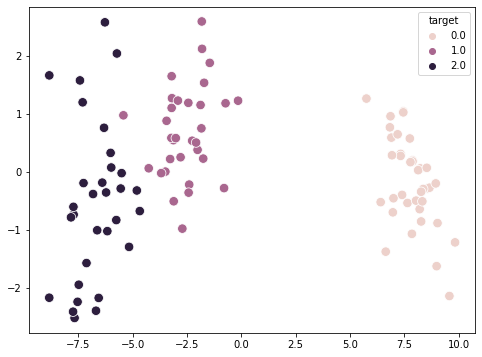

In [22]:
# As mentioned above, this is the second way in which I will reduce the dimentions to 2 and then plot the graph.

#Creating a new LDA model which will reduce the dimentions to 2. In n_components basically we are telling model to reduce features into 2
lda_2_features=LDA(n_components=2)

# The fit tranform method will take the training data and reduce dimentions into n_components
reduced_dimentions=lda.fit_transform(X_train, y_train)

# Decalring the figure size
plt.figure(figsize=(8,6))

# We are using first columns in reduced dimention for x axis and second column in reduced dimention for y axis
sns.scatterplot(x=reduced_dimentions[:, 0], y=reduced_dimentions[:, 1], s=90, hue=y_train)

## Part 3

I have already plotted the graph of both them in their sections. But to compare them, I will be plotting them again.


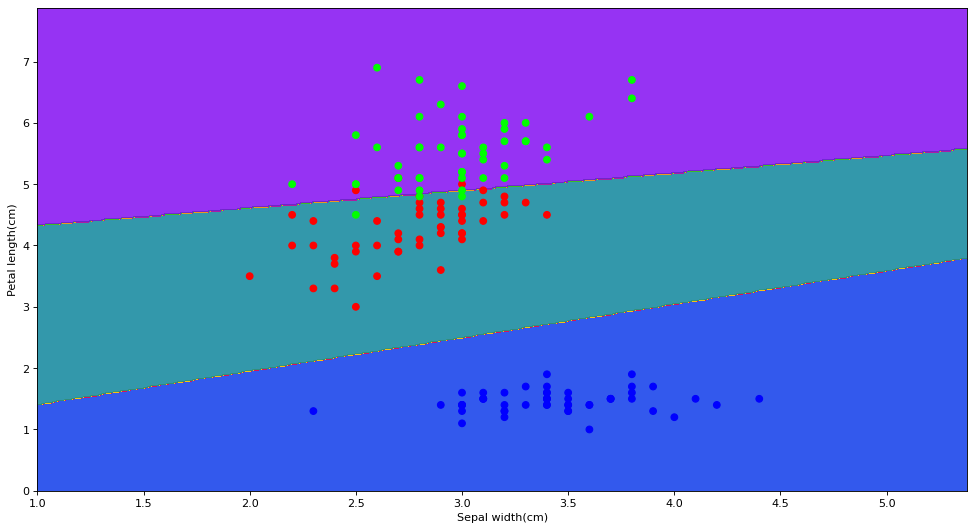

In [23]:
#METHOD-1

# We have stored the dataframe in the X and y but for the model we need a numpy array.
# For that we are taking all the rows and first and second column for X and target column for y
# Second column is for sepal width and third for petal length
X=iris_dataset.data[:, 1:3]
y=iris_dataset.target

#Creating a support vector machine model to classify the data by drawing linear boundaries.
#This is taking a linear kernel for liner boundary and C value as 1.
#Since we need to plot the graph and not to predict as not asked in the question so, I am taking all the rows to build the model.
svc = svm.SVC(kernel='linear', C=1.0).fit(X, y)

# Now we will plotting both the graphs on a same graph

#Setting up the figure size to 15*8
plt.figure(figsize=(15, 8), dpi=80)

# This will be creating the linear boundaries as asked in the question
plt.contourf(a, b, svc.predict(np.c_[a.ravel(), b.ravel()]).reshape(a.shape), cmap="prism", alpha=0.8)

# Plot also the training points as done 2 cells above
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')

#Creating x label
plt.xlabel('Sepal width(cm)')

#Creating y label
plt.ylabel('Petal length(cm)')

#Setting up the xlimit
plt.xlim(a.min(), a.max())

#Setting up the ylimit
plt.ylim(b.min(), b.max())

plt.show()

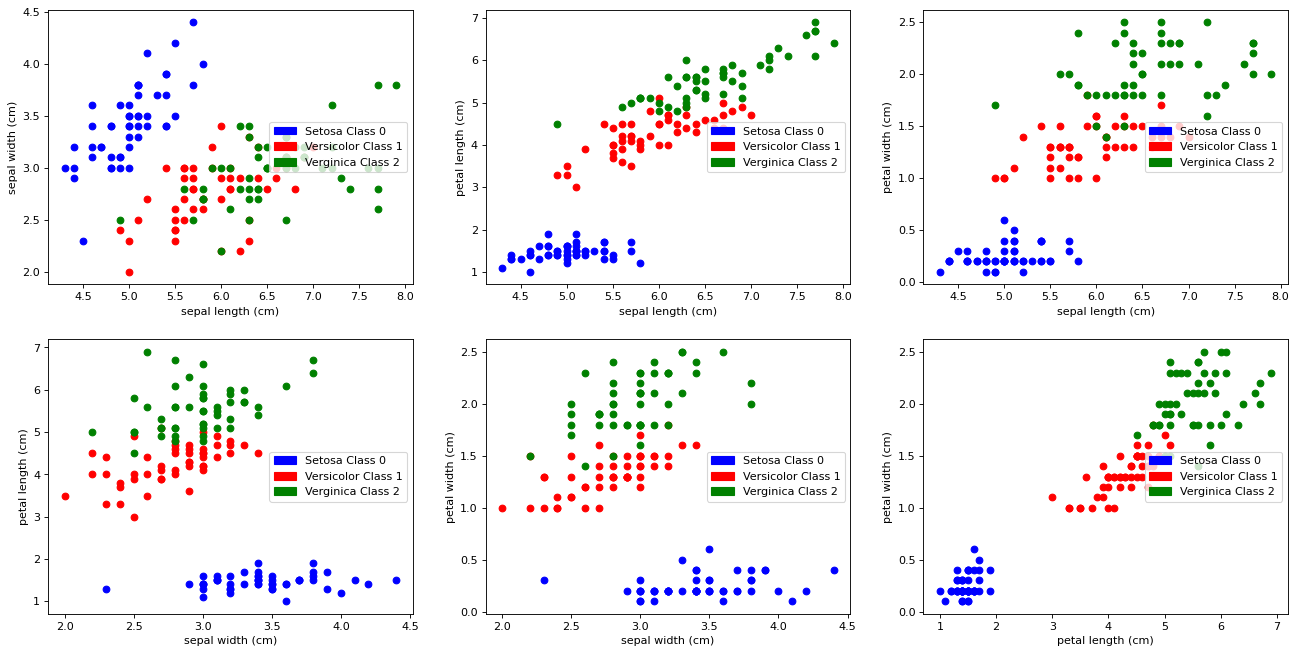

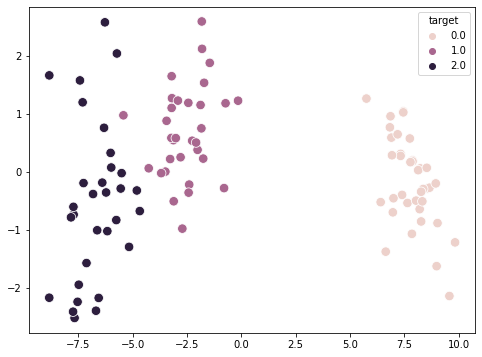

In [24]:
#METHOD-2

X=data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y=data["target"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=30)

# This function takes the graph number, names of x and y column and create a subplot of size (2,3) with subplot number as number.
def graph(plotNumber, xName, yName):

  #Defining the subplot number
  plt.subplot(2, 3, plotNumber)

  #Iterating in the feature columns
  for i in range(len(X[xName])):

    # If ith feature has class 0
    if int(y[i])==0:
      # Plotting the scatter matrix for xName column as x axis and yName column as y axis with color blue and label as 0
      plt.scatter(X[xName][i], X[yName][i], color="blue", label="0")

    # If ith feature has class 1
    elif int(y[i])==1:
      # Plotting the scatter matrix for xName column as x axis and yName column as y axis with color red and label as 1
      plt.scatter(X[xName][i], X[yName][i], color="red", label="1")

    # If ith feature has class 2
    elif int(y[i])==2:
      # Plotting the scatter matrix for xName column as x axis and yName column as y axis with color green and label as 2
      plt.scatter(X[xName][i], X[yName][i], color="green", label="2")
    
  #Using mpatches to create 3 labels for 3 different classes
  class_0=mpatches.Patch(color='blue', label='Setosa Class 0')
  class_1=mpatches.Patch(color='red', label='Versicolor Class 1')
  class_2=mpatches.Patch(color='green', label='Verginica Class 2')

  #legend is used to create the box in the graph which tells which color belongs to which class
  plt.legend(handles=[class_0, class_1, class_2], loc='right')

  # Creating a xlabel for the subplot
  plt.xlabel(xName)

  # Creating a ylabel for the subplot
  plt.ylabel(yName)

#Setting the size of the plot
plt.figure(figsize=(20, 10), dpi=80)

#Calling the graph method 6 times to make 6 subplots for 6 combinations
graph(1,'sepal length (cm)','sepal width (cm)')
graph(2,"sepal length (cm)","petal length (cm)")
graph(3,"sepal length (cm)","petal width (cm)")
graph(4,"sepal width (cm)","petal length (cm)")
graph(5,"sepal width (cm)","petal width (cm)")
graph(6,"petal length (cm)","petal width (cm)")

#Finally, calling the show method to show the graph.
plt.show()

#Creating a new LDA model which will reduce the dimentions to 2. In n_components basically we are telling model to reduce features into 2
lda_2_features=LDA(n_components=2)

# The fit tranform method will take the training data and reduce dimentions into n_components
reduced_dimentions=lda.fit_transform(X_train, y_train)

# Decalring the figure size
plt.figure(figsize=(8,6))

# We are using first columns in reduced dimention for x axis and second column in reduced dimention for y axis
sns.scatterplot(x=reduced_dimentions[:, 0], y=reduced_dimentions[:, 1], s=90, hue=y_train)

The reason that method2 will work more better than method1 is that because of the current accuracy. Accuracy is more in method2 as compared to method1. Moreover, for the incoming data we can't say that where the data will go. For example, say if class 1 data is going into class 2 and class 0 and getting merged with them then it will become very difficult to separate the data points using a line. Rather we need a polynomial kernel to separate them and due to the linearity is allowed, underfitting problem will come for the upcoming data which is not the case with the method2 where we are using LDA to predict and reducing the dimentions.

The next problem that can arise in method1 is that if more classes comes in it, then it will become more difficult to separate the classes from each other and underfitting will come for sure in method1 whereas we are always reducing dimentions to 2 in method2 and it will predict more accurately then method1.

# Q2. From MNIST Fashion data take 100 data points belonging to classes Sneaker, Pullover and Ankle boot.
### (i) Project these data points on a 2D plane using data reduction techniques PCA, T-SNE and MDA.
### (ii) Take 50 data points belonging to classes Sneaker, Pullover and Ankle boot from the test data set and compare the performance of these techniques(PCA, T-SNE, MDA) in terms of accuracy.
### (iii) According to your view what is the best dimensionality reduction technique for solving this problem and justify your answer.

## Part 1

We have to take 100 data points belonging to the 3 given classes.

In [25]:
# I am loading the mnist fashion data using fetch_openml and 'mnist_784' dataset
# This dataset takes some extra time to load so please wait for this cell to execute as the it has 70000+ data rows
XALL, yALL=fetch_openml('mnist_784', version=1, return_X_y=True)

In [26]:
#First of all we will see how many unique values are there in yALL column
uniques=[]
for data in yALL:
  if data not in uniques:
    uniques.append(data)
print("Unique Values are :", uniques)

Unique Values are : ['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']


So, there are 10 unique values but we need only 3 values that corresponds to sneaker, pullover and ankle boot.

Now, it can be easily found that class 2 represents the pullover, class 7 represents the sneaker and class 9 represents the ankle boot.

In [27]:
''' 
class 2 - Pullover
class 7 - Sneaker
class 9 - Ankle Boot
'''

#Creating empty X and y lists
X=[]
y=[]

# Now we will be iterating into yALL
for i in range(len(yALL)):
  # If the class is one of the three required then go inside if
  if yALL[i]=='2' or yALL[i]=='7' or yALL[i]=='0':
    #Firstly append the class into list y
    y.append(yALL[i])

    #Secondly append the features into list X
    X.append(XALL[i])

# Converting the lists into numpy arrays
X=np.array(X)
y=np.array(y)

In [28]:
# Printing the shapes of X and y
print(X.shape)
print(y.shape)

(21186, 784)
(21186,)


We have now removed the 7 classes which were not required. But still there are over 20,000 data rows in the X and y. We only require 100 data rows. The idea is to take see first 100 classes.

In [29]:
# Printing the first 100 classes
y[:100]

array(['0', '2', '7', '2', '0', '2', '2', '7', '0', '0', '7', '7', '0',
       '7', '0', '0', '0', '0', '7', '0', '2', '7', '0', '2', '7', '0',
       '7', '0', '7', '7', '7', '0', '2', '0', '2', '0', '0', '2', '0',
       '2', '7', '7', '7', '2', '7', '0', '7', '2', '2', '7', '0', '2',
       '2', '2', '7', '2', '2', '2', '0', '7', '7', '2', '0', '0', '0',
       '7', '2', '7', '0', '2', '7', '0', '7', '0', '2', '0', '7', '0',
       '0', '2', '2', '7', '0', '2', '7', '2', '2', '0', '7', '0', '0',
       '7', '0', '7', '7', '2', '2', '2', '0', '7'], dtype='<U1')

I can see that classes 0, 2 and 7 are evenly distributed so, instead of taking random 100 values, I am taking first 100 data rows.

In [30]:
#Restricting the X and y to take only first 100 data rows.
X=X[:100]
y=y[:100]

In [31]:
# Again checking for the shapes of X and y
print(X.shape)
print(y.shape)

(100, 784)
(100,)


Since, the data has 100 rows and there are only 3 required(asked) classes. So now, we have perfect data to apply model.

### Principal Component Analysis(PCA)

In [32]:
# Creating PCA model and since we need to plot 2D graph so I am taking n_components as 2 and random_state as 30
pcaModel=PCA(n_components=2, random_state=30)

#Since in this part, we only have to plot the graph so, I am using X instead of X_train. 
# I will be using X_train in the next part for prediction
reducedDim=pcaModel.fit_transform(X)

reducedDim contains the new values of features after reducing them from 750+ features into 2

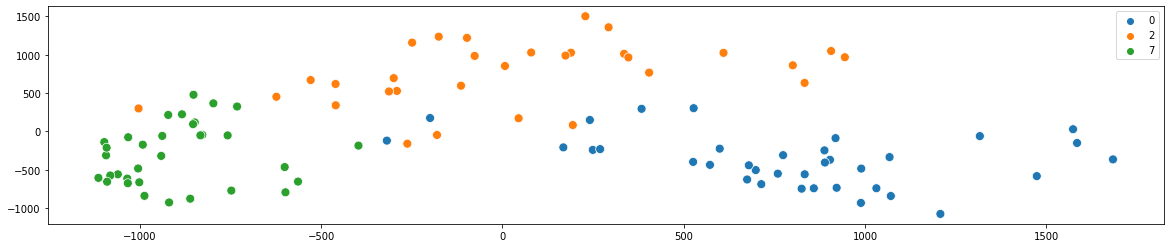

In [33]:
#Declaring the figure size for PCA
plt.figure(figsize=(20,4))

#PLotting a scatter matrix. Here reducedDim has 2 dimentions and we are taking first one as x axis and second for y axis
sns.scatterplot(x=reducedDim[:, 0], y=reducedDim[:, 1], s=80, hue=y)

### T-Distributed Stochastic Neighbor Embedding(TSNE)

In [34]:
# Creating TSNE model and since we need to plot 2D graph so I am taking n_components as 2 and random_state as 30
tsneModel=TSNE(n_components=2, random_state=2)

#Since in this part, we only have to plot the graph so, I am using X instead of X_train. 
# I will be using X_train in the next part for prediction
reducedDim=tsneModel.fit_transform(X)

reducedDim contains the new values of features after reducing them from 750+ features into 2

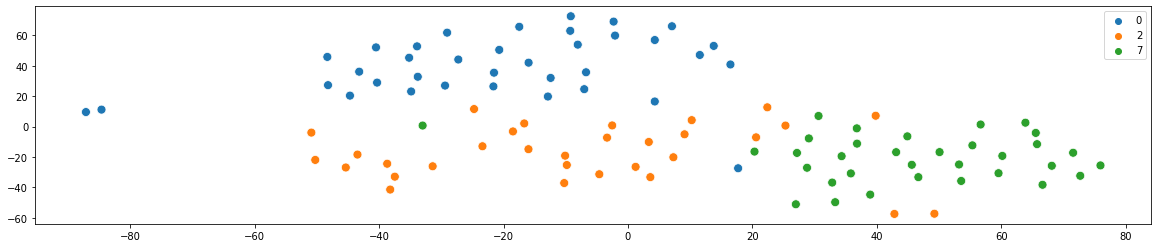

In [35]:
#Declaring the figure size for TSNE
plt.figure(figsize=(20,4))

#PLotting a scatter matrix. Here reducedDim has 2 dimentions and we are taking first one as x axis and second for y axis
sns.scatterplot(x=reducedDim[:, 0], y=reducedDim[:, 1], s=80, hue=y)

### Linear Discriminant Analysis(LDA)

In [36]:
# Creating LDA model and since we need to plot 2D graph so I am taking n_components as 2
LDAModel=LDA(n_components=2)

#Since in this part, we only have to plot the graph so, I am using X instead of X_train. 
# I will be using X_train in the next part for prediction
reducedDim=lda.fit_transform(X, y)

reducedDim contains the new values of features after reducing them from 750+ features into 2

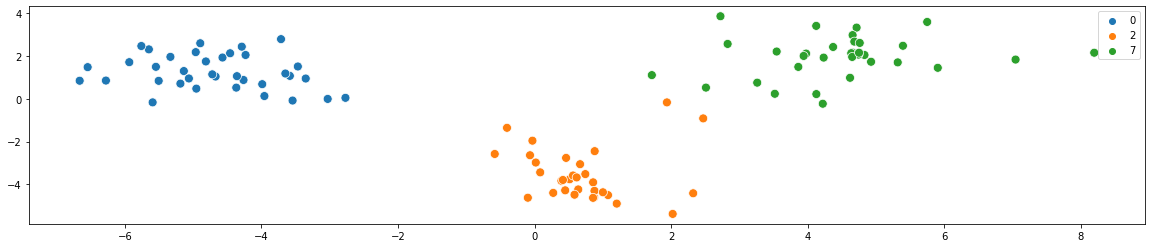

In [37]:
#Declaring the figure size for LDA
plt.figure(figsize=(20,4))

#PLotting a scatter matrix. Here reducedDim has 2 dimentions and we are taking first one as x axis and second for y axis
sns.scatterplot(x=reducedDim[:, 0], y=reducedDim[:, 1], s=80, hue=y)

### In this part, I have plotted the graph after dimentionality reduction to 2. In the next part I will be calculating the accuracy by taking all the conditions given in the question.

## Part 2

In this part, we have to predict and calculate the accuracy by dimentionality reduction. There are 2 things needed to be taken care of - first that train and test size will be 50-50 as given in the question and second that these three models will reduce dimentions so I will be using logistic classifier to predict the outcomes.

In [38]:
# Printing the shapes of X and y by using the X and Y as in part 1
print(X.shape)
print(y.shape)

(100, 784)
(100,)


In [39]:
# For this part we need to divide the data into training and testing data as asked in the question and test_size will be 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=30)

We will reduce the dimention by using each of the three models and then use logistic classifier to predict the outcome.

### Principal Component Analysis(PCA)

In [40]:
# Creating PCA model and since we need to plot 2D graph so I am taking n_components as 2 and random_state as 30
pcaModel=PCA(n_components=2, random_state=30)

# Now I will be using X_train to train the model
reducedDim=pcaModel.fit_transform(X_train)

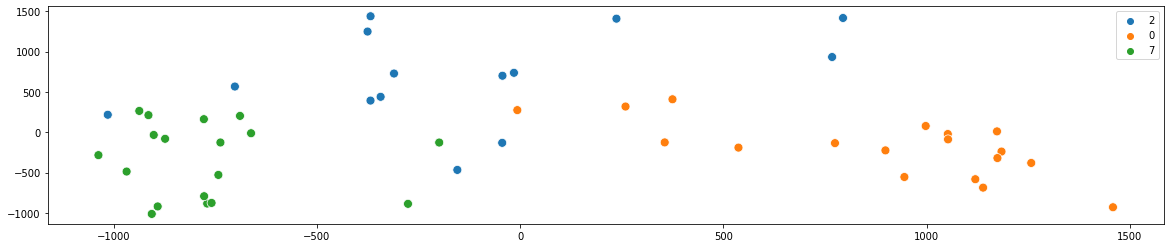

In [41]:
#Declaring the figure size for PCA
plt.figure(figsize=(20,4))

#PLotting a scatter matrix. Here reducedDim has 2 dimentions and we are taking first one as x axis and second for y axis
sns.scatterplot(x=reducedDim[:, 0], y=reducedDim[:, 1], s=80, hue=y_train)

In [42]:
# Creating the logistic classifier
logisitcModel=LogisticRegression()

#Fitting the features got after reducing dimentions and y as y_training data
logisitcModel.fit(reducedDim, y_train)

# Predicting the output for testing data
predicted_values=logisitcModel.predict(pcaModel.fit_transform(X_test))

# Printing the actual Y values and prediceted Y values by the Logistic Regression model after dimentionality reduction by PCA
print("Actual test output values are :", list(y_test))
print("Predicted test output values are :", list(predicted_values))

Actual test output values are : ['2', '7', '2', '2', '0', '2', '7', '7', '2', '0', '0', '0', '0', '0', '7', '7', '0', '0', '2', '7', '7', '0', '2', '7', '2', '0', '0', '7', '0', '7', '2', '2', '0', '2', '7', '7', '0', '7', '7', '2', '7', '2', '0', '2', '0', '0', '2', '2', '2', '0']
Predicted test output values are : ['2', '7', '0', '0', '0', '2', '7', '7', '2', '0', '7', '0', '0', '0', '7', '7', '0', '0', '0', '2', '7', '0', '2', '7', '2', '0', '0', '7', '0', '7', '2', '2', '0', '2', '7', '7', '0', '7', '7', '2', '7', '0', '0', '2', '0', '0', '2', '2', '2', '0']


In [43]:
print('Accuracy of logistic regression classifier after dimentiionality reduction by PCA :', logisitcModel.score(pcaModel.fit_transform(X_test), y_test))

Accuracy of logistic regression classifier after dimentiionality reduction by PCA : 0.88


So, we are getting 88% accuracy by first reducing dimentions using PCA and then appying logistic regression classifier which is a very good accuracy.

### T-Distributed Stochastic Neighbor Embedding(TSNE)

In [44]:
# Creating TSNE model and since we need to plot 2D graph so I am taking n_components as 2 and random_state as 30
tsneModel=TSNE(n_components=2, random_state=2)

# Now I will be using X_train to train the model
reducedDim=tsneModel.fit_transform(X_train)

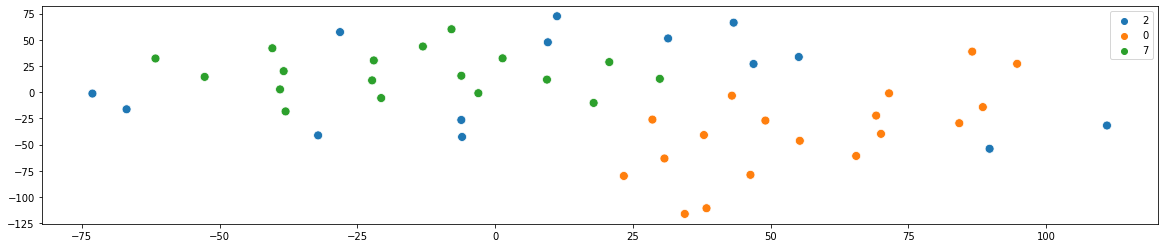

In [45]:
#Declaring the figure size for TSNE
plt.figure(figsize=(20,4))

#PLotting a scatter matrix. Here reducedDim has 2 dimentions and we are taking first one as x axis and second for y axis
sns.scatterplot(x=reducedDim[:, 0], y=reducedDim[:, 1], s=80, hue=y_train)

In [46]:
# Creating the logistic classifier
logisitcModel=LogisticRegression()

#Fitting the features got after reducing dimentions and y as y_training data
logisitcModel.fit(reducedDim, y_train)

# Predicting the output for testing data
predicted_values=logisitcModel.predict(tsneModel.fit_transform(X_test))

# Printing the actual Y values and prediceted Y values by the Logistic Regression model after dimentionality reduction by TSNE
print("Actual test output values are :", list(y_test))
print("Predicted test output values are :", list(predicted_values))

Actual test output values are : ['2', '7', '2', '2', '0', '2', '7', '7', '2', '0', '0', '0', '0', '0', '7', '7', '0', '0', '2', '7', '7', '0', '2', '7', '2', '0', '0', '7', '0', '7', '2', '2', '0', '2', '7', '7', '0', '7', '7', '2', '7', '2', '0', '2', '0', '0', '2', '2', '2', '0']
Predicted test output values are : ['7', '2', '7', '0', '7', '7', '2', '7', '7', '2', '0', '7', '0', '0', '2', '7', '7', '0', '7', '7', '2', '0', '7', '7', '7', '2', '0', '7', '0', '2', '7', '7', '0', '7', '0', '7', '2', '2', '2', '7', '2', '7', '7', '0', '7', '0', '7', '7', '7', '2']


In [47]:
print('Accuracy of logistic regression classifier after dimentiionality reduction by TSNE :', logisitcModel.score(tsneModel.fit_transform(X_test), y_test))

Accuracy of logistic regression classifier after dimentiionality reduction by TSNE : 0.3


So, we are getting 30% accuracy by first reducing dimentions using TSNE and then appying logistic regression classifier which is not a good accuracy as compared with that of case in PCA.



### Linear Discriminant Analysis(LDA)

In [48]:
# Creating LDA model and since we need to plot 2D graph so I am taking n_components as 2
LDAModel=LDA(n_components=2)

# Now I will be using X_train to train the model
reducedDim=lda.fit_transform(X_train, y_train)

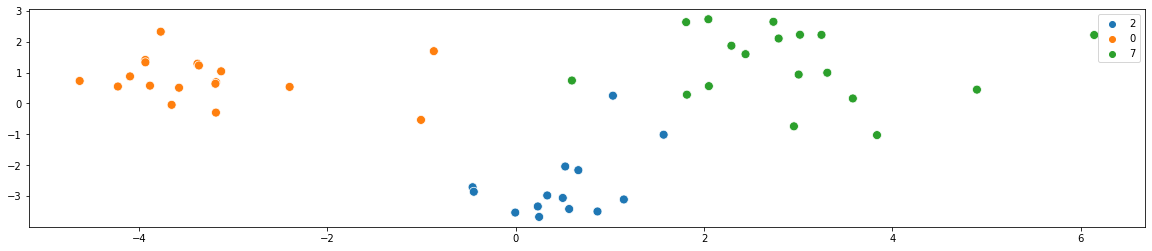

In [49]:
#Declaring the figure size for LDA
plt.figure(figsize=(20,4))

#PLotting a scatter matrix. Here reducedDim has 2 dimentions and we are taking first one as x axis and second for y axis
sns.scatterplot(x=reducedDim[:, 0], y=reducedDim[:, 1], s=80, hue=y_train)

In [50]:
# Creating the logistic classifier
logisitcModel=LogisticRegression()

#Fitting the features got after reducing dimentions and y as y_training data
logisitcModel.fit(reducedDim, y_train)

# Predicting the output for testing data
predicted_values=logisitcModel.predict(LDAModel.fit_transform(X_test, y_test))

# Printing the actual Y values and prediceted Y values by the Logistic Regression model after dimentionality reduction by LDA
print("Actual test output values are :", list(y_test))
print("Predicted test output values are :", list(predicted_values))

Actual test output values are : ['2', '7', '2', '2', '0', '2', '7', '7', '2', '0', '0', '0', '0', '0', '7', '7', '0', '0', '2', '7', '7', '0', '2', '7', '2', '0', '0', '7', '0', '7', '2', '2', '0', '2', '7', '7', '0', '7', '7', '2', '7', '2', '0', '2', '0', '0', '2', '2', '2', '0']
Predicted test output values are : ['2', '7', '2', '0', '0', '2', '7', '7', '2', '0', '0', '0', '0', '0', '7', '7', '0', '0', '2', '2', '7', '0', '2', '2', '2', '0', '0', '7', '0', '7', '2', '2', '0', '2', '7', '7', '0', '7', '7', '2', '7', '0', '0', '2', '0', '0', '2', '2', '2', '0']


In [51]:
print('Accuracy of logistic regression classifier after dimentiionality reduction by LDA :', logisitcModel.score(LDAModel.fit_transform(X_test, y_test), y_test))

Accuracy of logistic regression classifier after dimentiionality reduction by LDA : 0.92


So, we are getting 92% accuracy by first reducing dimentions using LDA and then appying logistic regression classifier which is the highest accuracy that I got and this means LDA is more good than PCA dimentionality reduction.

### Comparison between PCA, TSNE and LDA
#### Basically these three are used to reduce the dimentions. The dataset given to us has more than 750 features and I reduce these 750+ features into 2 features by using these three models one by one and then used a Logistic Regression Classfier to predict the accuracy of the model. The comparison in terms of accuracy I got is : accuracy(LDA)>accuracy(PCA)>>>accuracy(TSNE).

#### Accuracy with LDA = 92%
#### Accuracy with PCA = 88%
#### Accuracy with TSNE = 30%
#### So, I will be concluding that TSNE has shown bad performance and LDA and PCA both have shown a good performance and comparing them LDA is giving more accuracy then PCA.

## Part 3

Some of the observations were made in part 2 where I concluded that LDA is more good than PCA and PCA & LDA are more good than TSNE. But this conclusion was done on the basis of accuracy score. We can see that there is not high difference in accuracy scores of LDA and PCA so, we need a other reason on which we can compare them. But, there is a tremendous amount of difference of accuracies in TSNE and (LDA or PCA). It's nearly 3 times the accuracy of TSNE. So, I can directly conclude that I will not be taking TSNE to reduce dimentions for this question. We still need to compare between PCA and LDA. I will compare them on the basis of graph they have after dimentionality reduction.

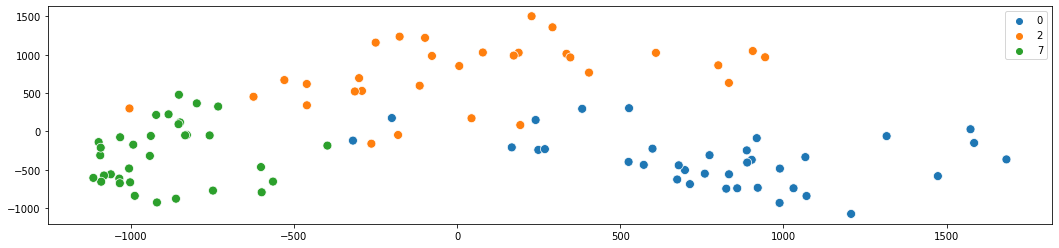

In [52]:
# Creating PCA model and since we need to plot 2D graph so I am taking n_components as 2 and random_state as 30
pcaModel=PCA(n_components=2, random_state=30)

#Since in this part, we only have to plot the graph so, I am using X instead of X_train. 
# I will be using X_train in the next part for prediction
reducedDim=pcaModel.fit_transform(X)

#Declaring the figure size for PCA
plt.figure(figsize=(18,4))

#PLotting a scatter matrix. Here reducedDim has 2 dimentions and we are taking first one as x axis and second for y axis
sns.scatterplot(x=reducedDim[:, 0], y=reducedDim[:, 1], s=80, hue=y)

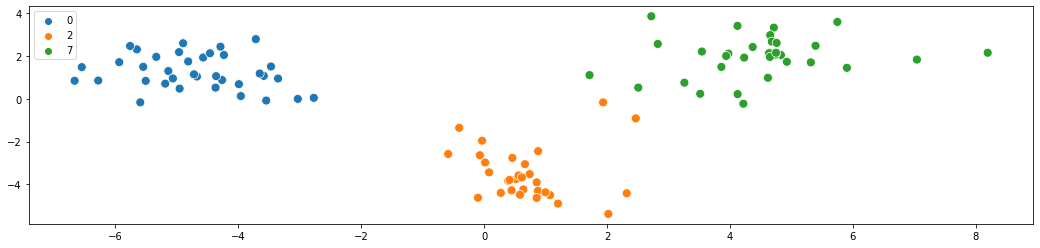

In [53]:
# Creating LDA model and since we need to plot 2D graph so I am taking n_components as 2
LDAModel=LDA(n_components=2)

#Since in this part, we only have to plot the graph so, I am using X instead of X_train. 
# I will be using X_train in the next part for prediction
reducedDim=lda.fit_transform(X, y)

#Declaring the figure size for LDA
plt.figure(figsize=(18,4))

#PLotting a scatter matrix. Here reducedDim has 2 dimentions and we are taking first one as x axis and second for y axis
sns.scatterplot(x=reducedDim[:, 0], y=reducedDim[:, 1], s=80, hue=y)

The main reason that why LDA has more accuracy then PCA is that the data is more hindered in LDA(or we can say that data is more close in LDA). It can be easily observed that there are 3 groups in both of the LDA and PCA but in LDA, the three groups are not scattered much and are coming within them and in PCA, the points are scattered throughout the graph. In LDA, there is no interference of any group and in PCA, some of the classes have values interfering with the other class. This will lead to a good accuracy in LDA since classes can be distinguished easily. At this moment, the points in PCA are not much scattered due to which accuracy is coming high. But when new points will be added we can easily say points will remain to be intact(or which its own group) in LDA and will get more scattered with PCA. Talking about the TSNE, the same problem comes there that in TSNE, the points are even moe scattered than PCA due to which it has very low accuracy.

So, making this observation is also important and I will go for LDA because in future also it will give a good accuracy because its points will not be much scattered as compared to PCA and TSNE. PCA's accuracy will decrease at a high rate when data points will be increases that is not the case with LDA.

So, according to me, LDA is the best dimentionality reduction techniques(out of PCA, LDA and TSNE) for solving this problem. I have answered this by seeing the accuracy, scattering of the graph and hinderness of the graphs.